В этом задании будет использоваться датасет boston из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.

In [90]:
# from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression as LR

from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('../..')
from lib import *

In [55]:
boston = load_boston()
X = boston.data
y = boston.target

In [56]:
Xl, Xt, yl, yt = train_test_split(X, y, test_size=0.25, random_state=0)

In [97]:
int(len(X)*0.75)

379

In [98]:
g = 380
Xl = X[:g]
yl = y[:g]
Xt = X[g:]
yt = y[g:]

Заведите массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами). В цикле от обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). В бустинге зачастую используются сотни и тысячи деревьев, но мы ограничимся 50, чтобы алгоритм работал быстрее, и его было проще отлаживать (т.к. цель задания разобраться, как работает метод). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с полученным в задании 1 правилом. Попробуйте для начала всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но т.к. в нашем учебном примере на стандартном датасете будет всего 50 деревьев, возьмем для начала шаг побольше.

В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X:

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]
(считаем, что base_algorithms_list - список с базовыми алгоритмами, coefficients_list - список с коэффициентами перед алгоритмами)

Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью mean_squared_error в sklearn.metrics. Возведите результат в степень 0.5, чтобы получить RMSE. Полученное значение RMSE — ответ в пункте 

In [25]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [83]:
N = 50
# base_algorithms_list = np.zeros(N)
base_algorithms_list = []
coefficients_list = []
mse_list = []
# coefficients_list = np.full(N, 0.9)

In [68]:
%%time
for i in range(N):
    s = yl - gbm_predict(Xl)
    coefficients_list.append(.9)
    base_algorithms_list.append(DTR(max_depth=5, random_state=42).fit(Xl, s))
    mse_list.append(MSE(yt, gbm_predict(Xt)))

CPU times: user 29.3 s, sys: 20 ms, total: 29.4 s
Wall time: 29.7 s


In [78]:
pf('w4-as2-2', MSE(yt,gbm_predict(Xt)) ** .5)

w4-as2-2="5.09051290263"



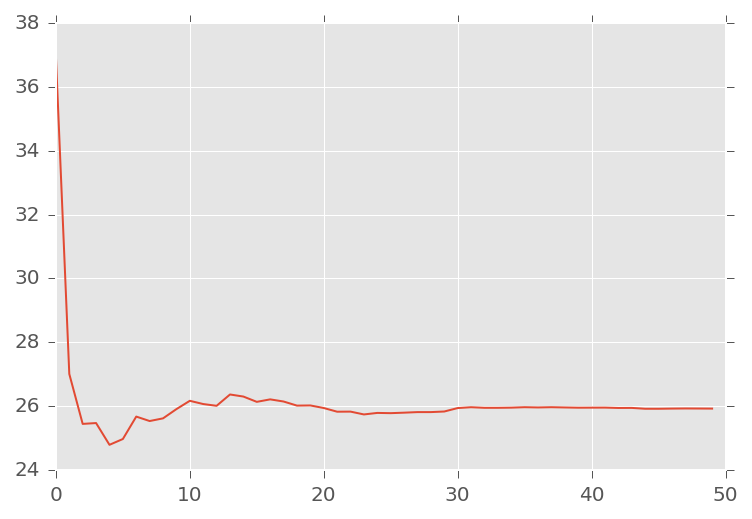

In [74]:
plt.plot(mse_list)

Задание 3

Вас может также беспокоить, что двигаясь с постоянным шагом, вблизи минимума ошибки ответы на обучающей выборке меняются слишком резко, перескакивая через минимум. Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 9). Используйте качество работы алгоритма как ответ в пункте 3. В реальности часто применяется следующая стратегия выбора шага: как только выбран алгоритм, подберем коэффициент перед ним численным методом оптимизации таким образом, чтобы отклонение от правильных ответов было минимальным. Мы не будем предлагать вам реализовать это для выполнения задания, но рекомендуем попробовать разобраться с такой стратегией и реализовать ее при случае для себя.

CPU times: user 27.9 s, sys: 0 ns, total: 27.9 s
Wall time: 28.2 s


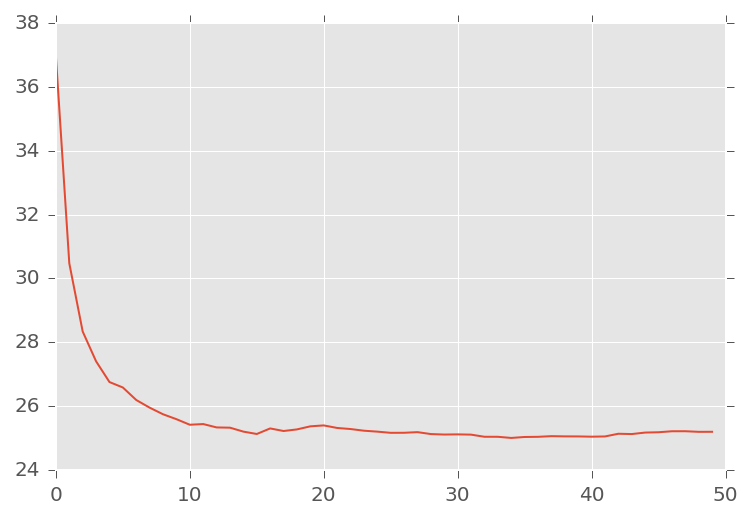

In [84]:
%%time
for i in range(N):
    s = yl - gbm_predict(Xl)
    if i < 10: coef = .9/(1. + i)
    coefficients_list.append(coef)
    base_algorithms_list.append(DTR(max_depth=5, random_state=42).fit(Xl, s))
    mse_list.append(MSE(yt, gbm_predict(Xt)))
plt.plot(mse_list)

In [80]:
pf('w4-as2-3', MSE(yt,gbm_predict(Xt)) ** .5)

w4-as2-3="5.09046639319"



Задание 4

Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn, но для этого задания вы можете использовать любую реализацию. Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций (и подумайте, почему), а также с ростом глубины деревьев. На основе наблюдений выпишите через пробел номера правильных из приведенных ниже утверждений в порядке возрастания номера (это будет ответ в п.4):

1) С увеличением числа деревьев начиная с некоторого момента качество работы градиентного бустинга не меняется существенно.

2) С увеличением числа деревьев начиная с некоторого момента градиентный бустинг начинает переобучаться.

3) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга на тестовой выборке начинает ухудшаться

4) С ростом глубины деревьев, начиная с некоторого момента, качество работы градиентного бустинга перестает существенно изменяться

In [89]:
pf('w4-as2-4', "2 3")

w4-as2-4="2 3"



Задание 5

Сравните получаемое с помощью градиентного бустинга качество с качеством работы линейной регрессии. Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE. Полученное качество - ответ в пункте 5. В данном примере качество работы простой модели должно было оказаться хуже, но не стоит забывать, что так бывает не всегда. В заданиях к этому курсу вы еще встретите пример обратной ситуации.

In [99]:
pf('w4-as2-5', MSE(yt, LR().fit(Xl, yl).predict(Xt)) ** .5)

w4-as2-5="7.84812179648"



In [ ]:
w4-as2-5="5.45807284343"